In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [36]:
train_proteins = pd.read_csv('/Users/habibi/Downloads/Parkinson_Prancers/amp-parkinsons-disease-progression-prediction/train_proteins.csv')

In [37]:
train_proteins.head()


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [38]:
train_proteins['patient_id'].nunique()


248

In [39]:
train_proteins.groupby('patient_id')['visit_id'].count().sort_values(ascending=False)


patient_id
62723    1929
20404    1924
23391    1919
26210    1912
18183    1899
         ... 
55240     429
42086     427
25911     419
52119     417
41930     199
Name: visit_id, Length: 248, dtype: int64

In [40]:
train_proteins['visit_id'].nunique()

1113

In [41]:
train_proteins['UniProt'].nunique()


227

In [42]:
train_proteins[train_proteins['patient_id'] == 55]

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
143003,55_36,36,55,Q9UHG2,377550.0
143004,55_36,36,55,Q9UKV8,74976.1
143005,55_36,36,55,Q9UNU6,31732.6
143006,55_36,36,55,Q9Y646,22186.5


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

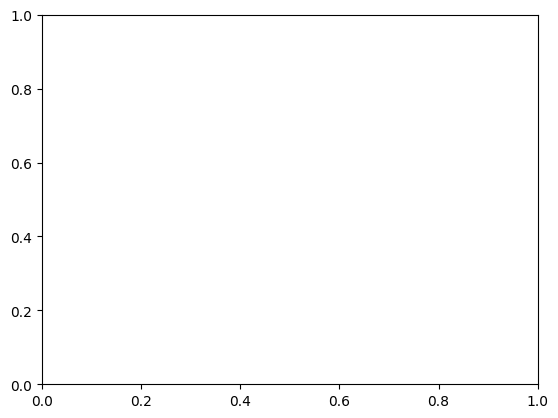

In [43]:
sns.boxenplot(train_proteins['NPX'])

In [ ]:
train_proteins[train_proteins['patient_id'] == 55]['UniProt'].nunique()


In [ ]:
train_proteins['visit_month'].unique()

In [44]:
train_proteins['visit_month'].value_counts()


visit_month
0      40587
12     37467
24     36225
36     31156
48     28838
6      25991
60     17572
84      6288
72      4407
18      1657
108      855
3        641
96       423
54       418
30       216
Name: count, dtype: int64

In [45]:
train_proteins['UniProt'].nunique()


227

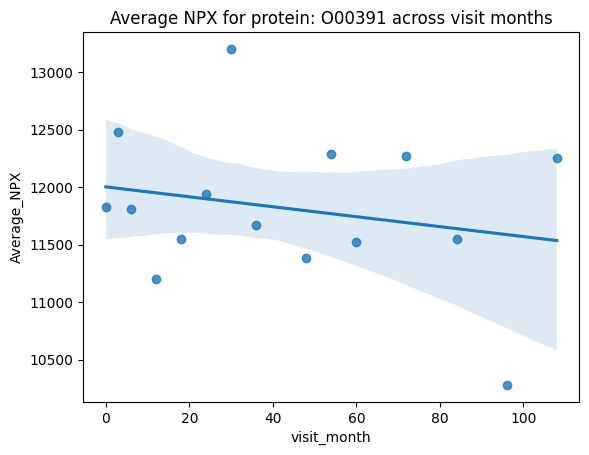

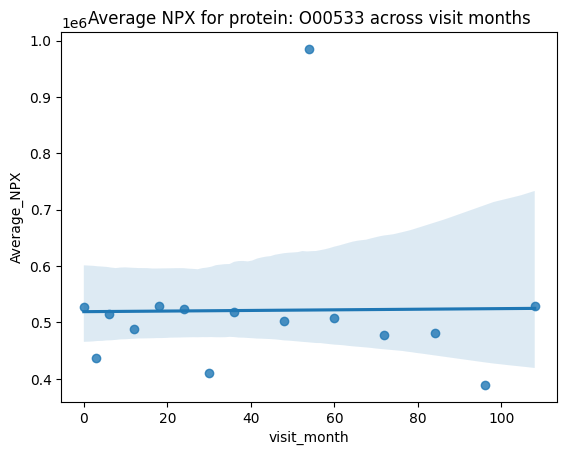

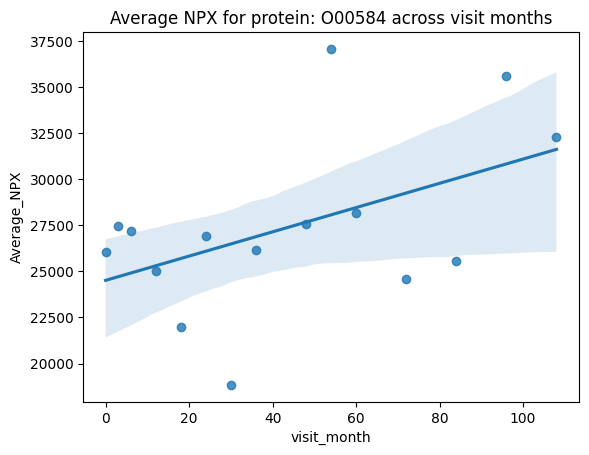

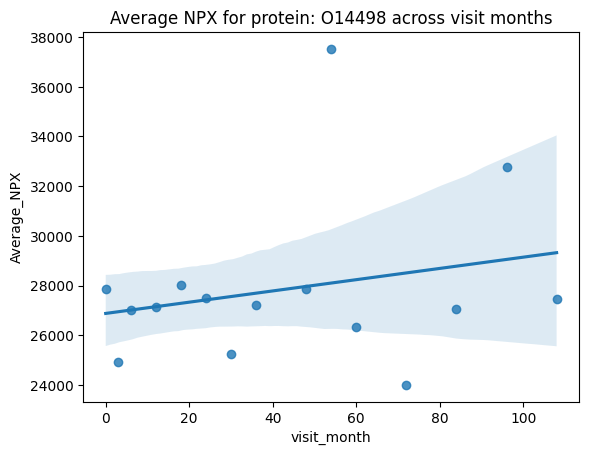

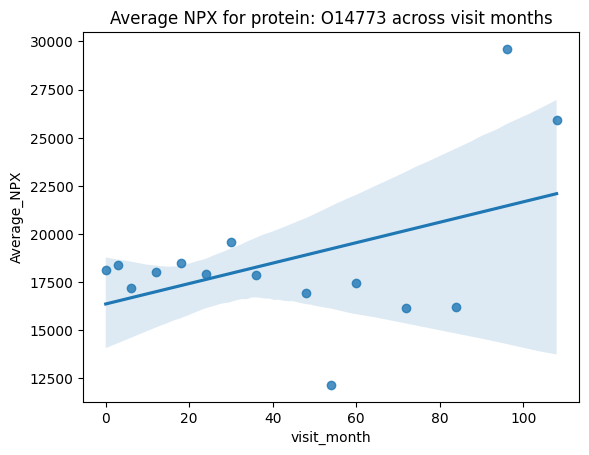

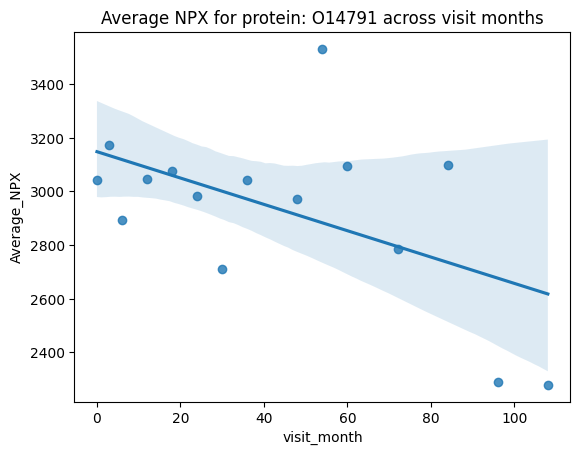

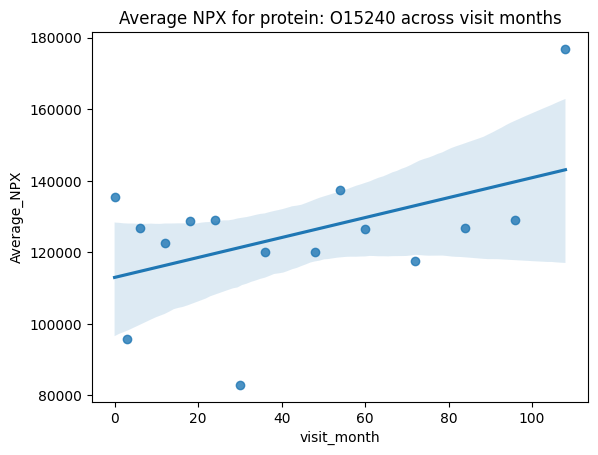

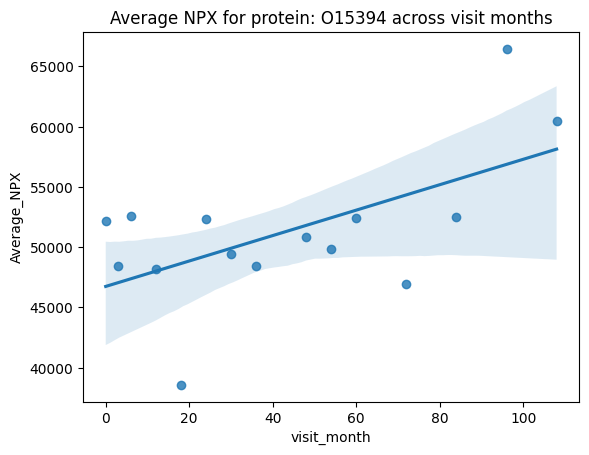

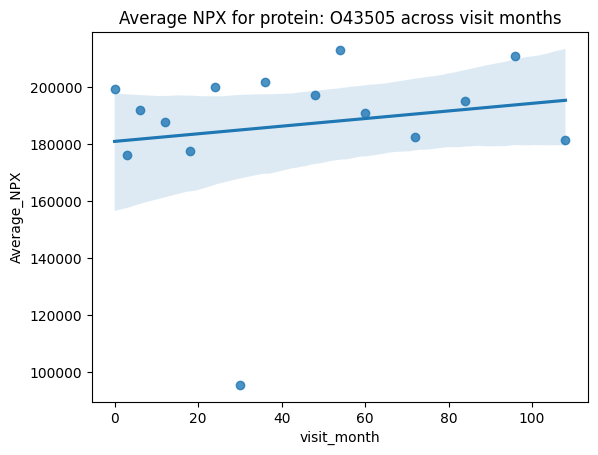

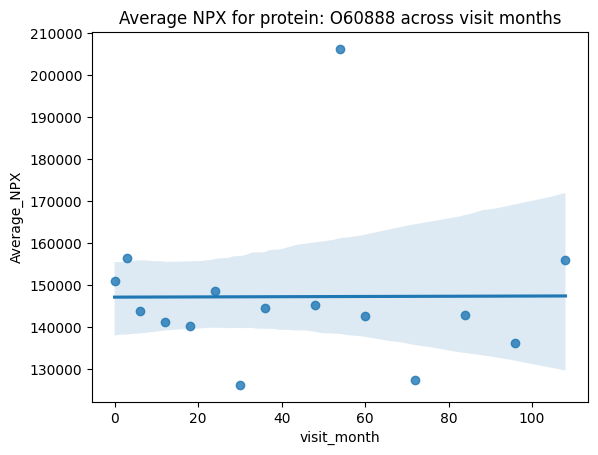

In [46]:
for prot in train_proteins['UniProt'].unique()[:10]:
    df = train_proteins[train_proteins['UniProt'] == prot]
    df_1 = df.groupby('visit_month')['NPX'].mean().reset_index()
    df_1.columns = ['visit_month', 'Average_NPX']
    sns.regplot(data = df_1, x = 'visit_month', y = 'Average_NPX')
    plt.title('Average NPX for protein: {} across visit months'.format(prot))
    plt.show()

In [47]:
train_peptides = pd.read_csv('/Users/habibi/Downloads/Parkinson_Prancers/amp-parkinsons-disease-progression-prediction/train_peptides.csv')

In [48]:
train_peptides.head(2)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0


In [49]:
train_peptides['Peptide'].nunique()


968

<AxesSubplot:ylabel='Density'>

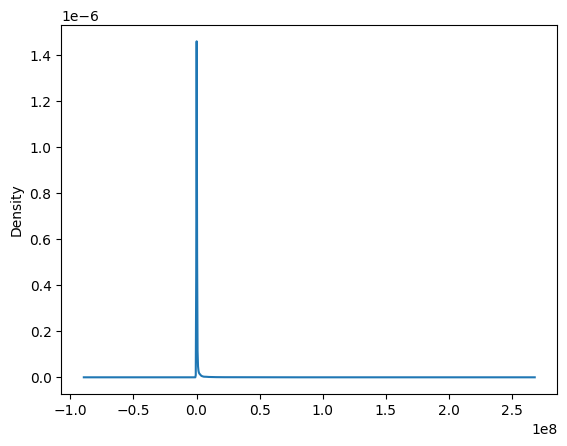

In [50]:
train_peptides['PeptideAbundance'].plot(kind='kde')


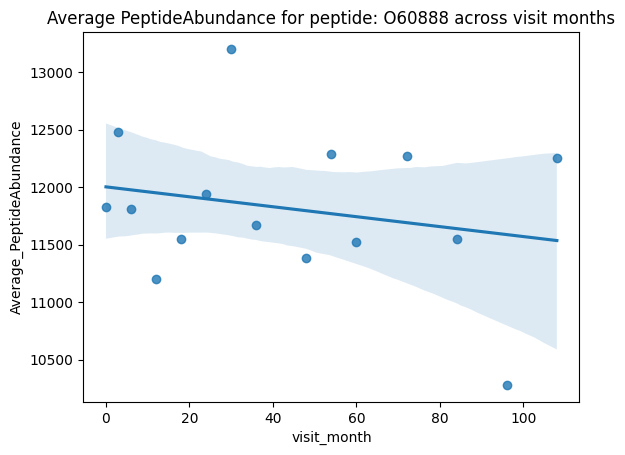

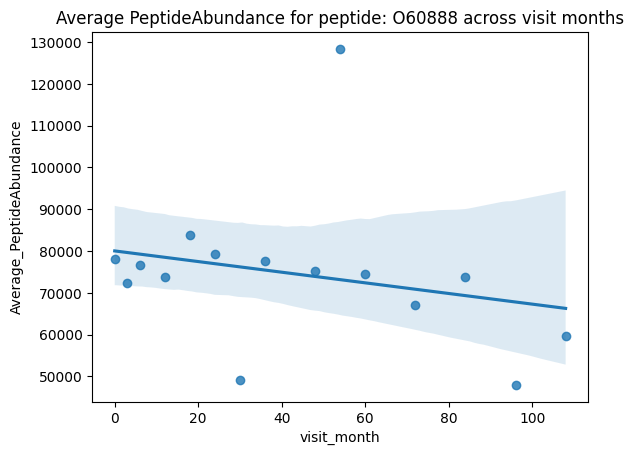

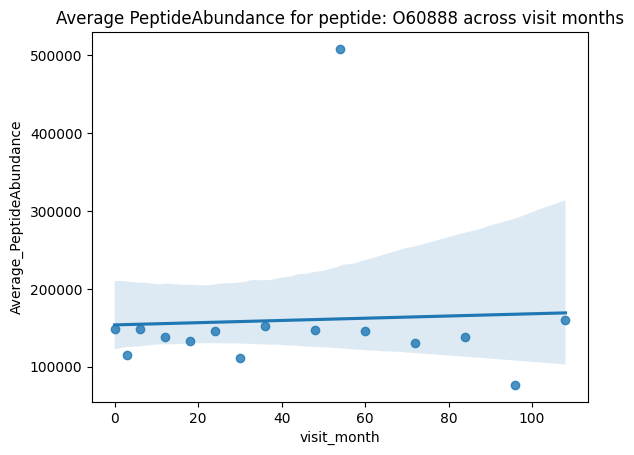

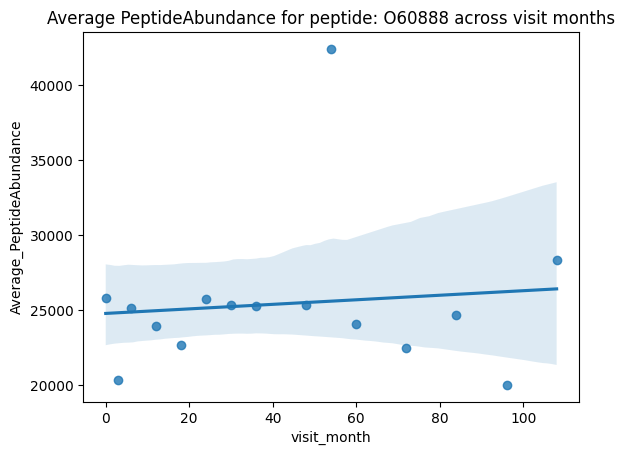

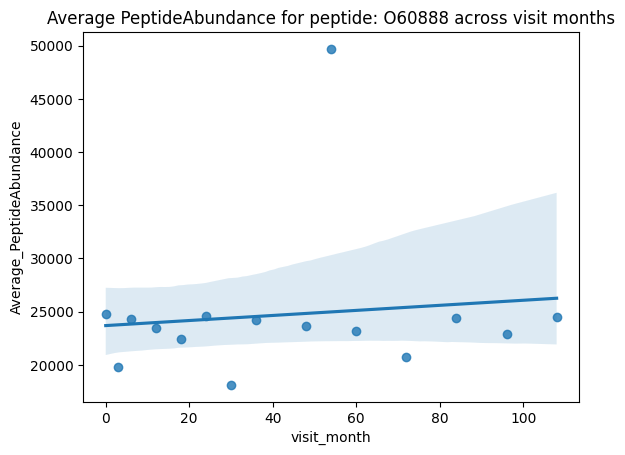

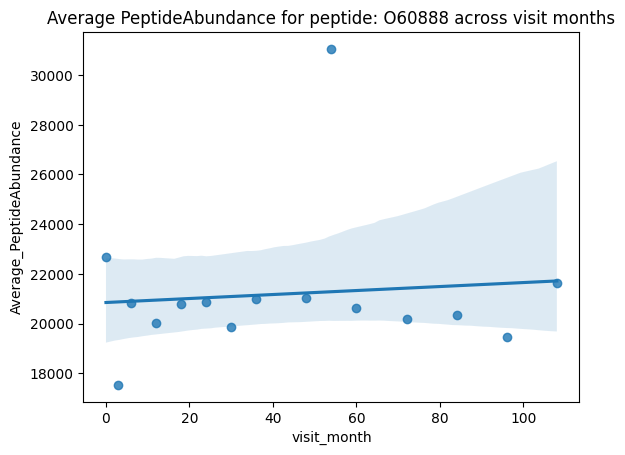

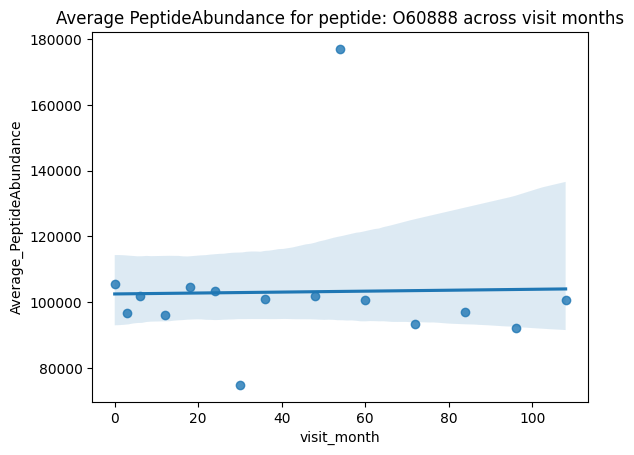

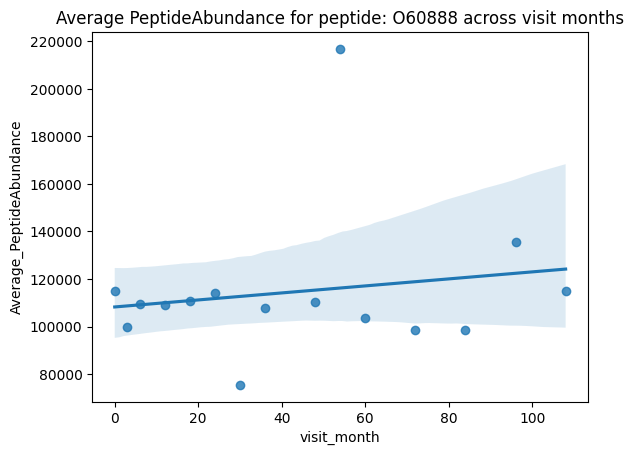

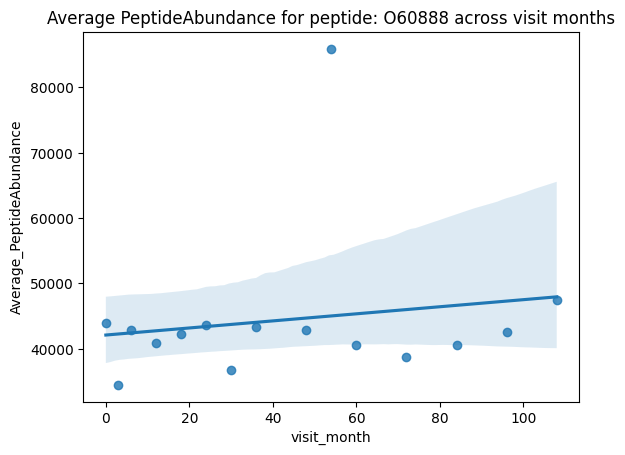

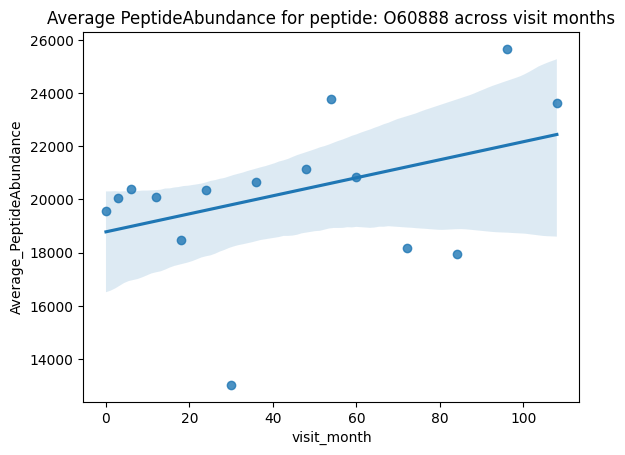

In [51]:
for peptide in train_peptides['Peptide'].unique()[:10]:
    df = train_peptides[train_peptides['Peptide'] == peptide]
    df_1 = df.groupby('visit_month')['PeptideAbundance'].mean().reset_index()
    df_1.columns = ['visit_month', 'Average_PeptideAbundance']
    sns.regplot(data = df_1, x = 'visit_month', y = 'Average_PeptideAbundance')
    plt.title('Average PeptideAbundance for peptide: {} across visit months'.format(prot))
    plt.show()

In [52]:
train_clinical_data = pd.read_csv('/Users/habibi/Downloads/Parkinson_Prancers/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv')

In [53]:
train_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN


In [54]:
train_clinical_data['patient_id'].nunique()


248

In [55]:
train_clinical_data.groupby('patient_id')['visit_month'].nunique().sort_values(ascending=False)

patient_id
55096    17
57108    17
15009    17
16778    16
52266    16
         ..
13968     5
20792     5
62732     4
60443     3
14450     3
Name: visit_month, Length: 248, dtype: int64

In [56]:
train_clinical_data[train_clinical_data['patient_id'] == 55096]['visit_month'].min()


0

In [57]:
train_clinical_data[train_clinical_data['patient_id'] == 55096]['visit_month'].max()


108

In [60]:
train_clinical_data['upd23b_clinical_state_on_medication'].value_counts()

upd23b_clinical_state_on_medication
On     775
Off    513
Name: count, dtype: int64

In [61]:
supplemental_clinical_data = pd.read_csv('/Users/habibi/Downloads/Parkinson_Prancers/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv')


In [62]:
supplemental_clinical_data.shape

(2223, 8)

In [63]:
supplemental_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN


In [64]:
supplemental_clinical_data.groupby('upd23b_clinical_state_on_medication')['updrs_3'].mean()


upd23b_clinical_state_on_medication
Off     2.793103
On     22.275641
Name: updrs_3, dtype: float64

In [65]:
supplemental_clinical_data.groupby('upd23b_clinical_state_on_medication')['updrs_1'].mean()


upd23b_clinical_state_on_medication
Off    3.379310
On     5.741995
Name: updrs_1, dtype: float64

In [66]:
supplemental_clinical_data.groupby('upd23b_clinical_state_on_medication')['updrs_4'].mean()


upd23b_clinical_state_on_medication
Off         NaN
On     0.642247
Name: updrs_4, dtype: float64

# Merge the data and perform feature engineering¶


In [67]:
train_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN


In [68]:
train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].corr()


,updrs_1,updrs_2,updrs_3,updrs_4
updrs_1,1.000000,0.661802,0.434569,0.432620
updrs_2,0.661802,1.000000,0.735106,0.383866
updrs_3,0.434569,0.735106,1.000000,0.221593
updrs_4,0.432620,0.383866,0.221593,1.000000


In [69]:
train_proteins.head(2)


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0


In [70]:
train_proteins.shape


(232741, 5)

In [71]:
train_peptides.head(2)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0


In [72]:
train_peptides.shape

(981834, 6)

In [73]:
train_data = pd.merge(train_proteins, train_peptides, on=['patient_id', 'visit_month', 'UniProt'], how='outer')

In [74]:
len(train_data)

981834

In [75]:
train_data.shape

(981834, 8)

In [76]:
train_data.head(2)

,visit_id_x,visit_month,patient_id,UniProt,NPX,visit_id_y,Peptide,PeptideAbundance
0,55_0,0,55,O00391,11254.3,55_0,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,732430.0,55_0,GNPEPTFSWTK,102060.0


In [77]:
(train_data['visit_id_x'] != train_data['visit_id_y']).sum()

0

In [78]:
train_data = train_data.drop(columns = ['visit_id_y'])

In [79]:
train_data.head(2)

,visit_id_x,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0


In [80]:
train_data = train_data.rename(columns = {'visit_id_x': 'visit_id'})

In [81]:
train_data.head(2)

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0


In [82]:
train_data = pd.merge(train_data, train_clinical_data, on=['visit_month', 'patient_id'], how='outer')

In [83]:
train_data.head(2)

,visit_id_x,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,visit_id_y,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_0,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,55_0,10.0,6.0,15.0,NaN,NaN


In [84]:
train_data = train_data.drop(columns = ['visit_id_y'])
train_data = train_data.rename(columns = {'visit_id_x': 'visit_id'})

In [85]:
train_data.head(2)

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,10.0,6.0,15.0,NaN,NaN


In [86]:
train_data.shape

(983381, 12)

Null values for different type of updrs

In [87]:
train_data['updrs_1'].isna().sum(), train_data['updrs_2'].isna().sum(), train_data['updrs_3'].isna().sum(), train_data['updrs_4'].isna().sum()

(40091, 40092, 49225, 486843)

In [88]:
train_data['UniProt'].isna().sum()

1547

In [89]:
train_data['NPX'].isna().sum()

1547

In [90]:
supplemental_clinical_data.head(2)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN


In [91]:
supplemental_clinical_data.shape

(2223, 8)

In [92]:
train_proteins['UniProt'].isna().sum()

0

In [93]:
train_proteins['NPX'].isna().sum()

0

In [94]:
train_peptides['PeptideAbundance'].isna().sum()

0

In [95]:
train_peptides['Peptide'].isna().sum()

0

In [96]:
train_data.head(2)

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,10.0,6.0,15.0,NaN,NaN


In [97]:
train_data['visit_month'].isna().sum()

0

In [98]:
train_data['visit_month'].value_counts().sort_values(ascending=False)

visit_month
0      171102
12     158177
24     152106
36     130982
48     121402
6      110840
60      74644
84      26799
72      18714
18       7001
108      3640
3        2856
54       1909
96       1871
30       1085
42        154
9          99
Name: count, dtype: int64

In [99]:
train_clinical_data.head(2)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

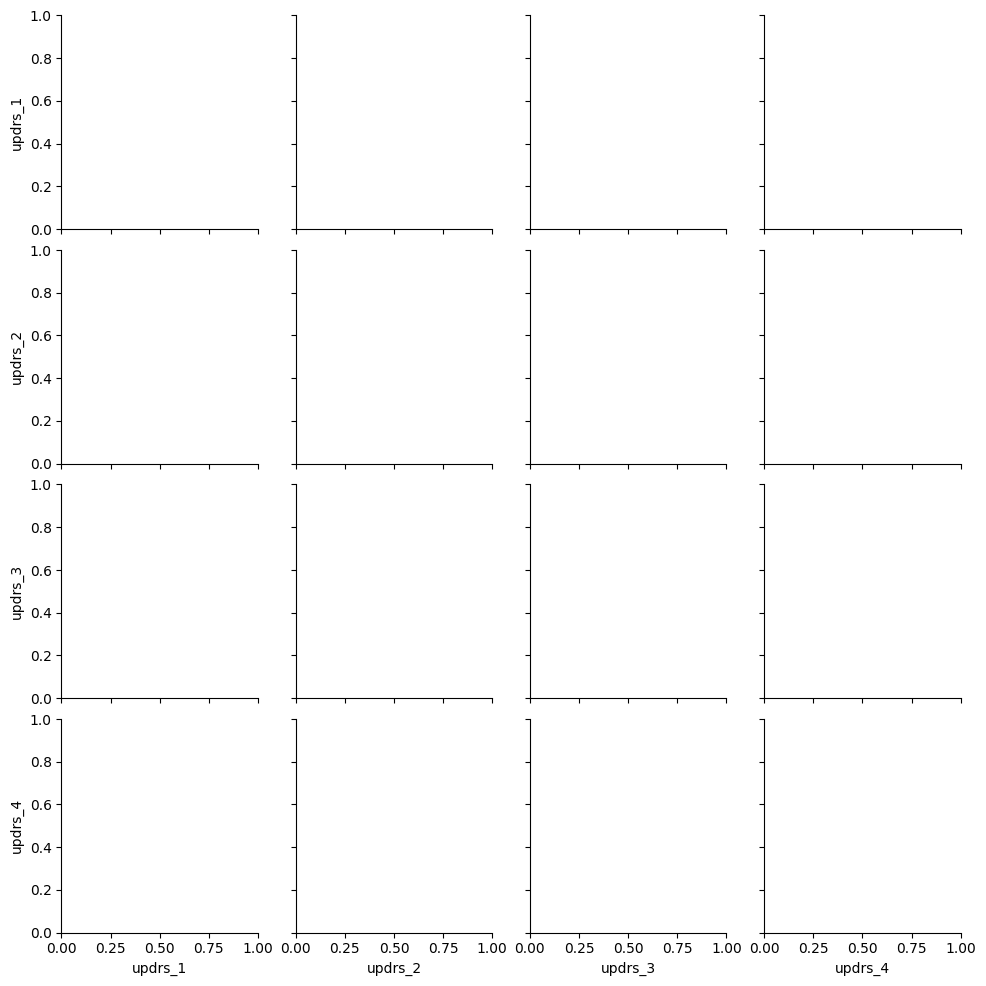

In [100]:
sns.pairplot(train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']])


# Baseline Model

In [101]:
train_data.head(2)


,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,10.0,6.0,15.0,NaN,NaN


In [102]:
example_test_file = pd.read_csv('/Users/habibi/Downloads/Parkinson_Prancers/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv')

In [103]:
example_test_file.head(2)


,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0


In [104]:
train_data.groupby('visit_id')['UniProt'].count().sort_values(ascending = True)


visit_id
25562_36     94
19088_48    497
58648_84    525
19088_12    529
57478_24    538
           ... 
65043_24    944
35675_12    944
35477_48    945
16574_12    946
47171_6     947
Name: UniProt, Length: 1113, dtype: int64

In [105]:
train_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN


In [106]:
train_clinical_data['updrs_1'].isna().sum() / train_clinical_data.shape[0]


0.0003824091778202677

In [107]:
train_clinical_data['updrs_2'].isna().sum() / train_clinical_data.shape[0]


0.0007648183556405354

In [108]:
train_clinical_data['updrs_3'].isna().sum() / train_clinical_data.shape[0]


0.009560229445506692

In [109]:
train_clinical_data['updrs_4'].isna().sum() / train_clinical_data.shape[0]


0.39694072657743784

In [110]:
train_clinical_data['updrs_4'].unique()


array([nan,  0.,  3.,  5.,  7., 10.,  8.,  4.,  6.,  2.,  9.,  1., 13.,
       11., 14., 12., 20., 15., 16., 17.])

In [111]:
train_clinical_data['upd23b_clinical_state_on_medication'].isna().sum() / train_clinical_data.shape[0]


0.5074569789674952

In [112]:
train_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN


In [113]:
supplemental_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN


In [114]:
supplemental_clinical_data['visit_id'].duplicated().sum()


0

In [115]:
def data_preprocessing(train_proteins, train_peptides, train_clinical_data, supplemental_data = supplemental_clinical_data, 
                       kind='updrs_1', train_or_test='train'):
    if train_or_test == 'test':
        df = pd.get_dummies(train_clinical_data['updrs_test'])
        train_clinical_data = pd.concat([train_clinical_data, df], axis = 1)
        train_clinical_data = train_clinical_data.drop(columns = ['updrs_test'])
    df_1 = train_proteins.groupby('visit_id', as_index=False).agg(NPX_mean = ('NPX', np.mean),
                                                           NPX_min = ('NPX', np.min),
                                                           NPX_max = ('NPX', np.max), 
                                                           NPX_std = ('NPX', np.std))

    df_2 = train_peptides.groupby('visit_id', as_index=False).agg(PeptideAbundance_mean = ('PeptideAbundance', np.mean),
                                                                PeptideAbundance_min = ('PeptideAbundance', np.min),
                                                                PeptideAbundance_max = ('PeptideAbundance', np.max),
                                                                PeptideAbundance_std = ('PeptideAbundance', np.std))

    df_3 = pd.merge(df_1, df_2, on='visit_id', how='outer')
    
    if kind == 'updrs_1':
        cols_required = ['visit_id', 'updrs_1']
    elif kind == 'updrs_2':
        cols_required = ['visit_id', 'updrs_2']
    elif kind == 'updrs_3':
        cols_required = ['visit_id', 'updrs_3']
    else:
        cols_required = ['visit_id', 'updrs_4']
            
    df_3 = pd.merge(df_3, train_clinical_data[cols_required], on='visit_id', how='left')
    
    df_3['month'] = df_3['visit_id'].str.split('_').str[1]
    
    if supplemental_data is not None:
        supplemental_data = supplemental_data[['visit_id', kind, 'visit_month']]

        supplemental_data = supplemental_data.rename(columns = {'visit_month': 'month'})

        df_3 = pd.concat([df_3, supplemental_data], ignore_index=True)
    
    df_3 = df_3.dropna(subset=[kind])
    
    df_3 = df_3.fillna(0)
    
    df_3 = df_3.reset_index(drop=True)
    
    if train_or_test == 'train':
        df_3 = df_3.drop(columns = 'visit_id')
    if train_or_test == 'test':
        df_3 = df_3[df_3[kind] == 1]
    return df_3

In [116]:
train_updrs_1 = data_preprocessing(train_proteins, train_peptides, train_clinical_data, supplemental_data = supplemental_clinical_data,
                                   kind='updrs_1')
train_updrs_2 = data_preprocessing(train_proteins, train_peptides, train_clinical_data, supplemental_data = supplemental_clinical_data,
                                   kind='updrs_2')
train_updrs_3 = data_preprocessing(train_proteins, train_peptides, train_clinical_data, supplemental_data = supplemental_clinical_data,
                                   kind='updrs_3')
train_updrs_4 = data_preprocessing(train_proteins, train_peptides, train_clinical_data, supplemental_data = supplemental_clinical_data,
                                   kind='updrs_4')


In [117]:
def smape(y_true, y_pred):
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true!=0)|(y_pred!=0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    print("&%&%&%&%&%")
    print(y_true)
    print("&%&%&%&%&%")
    return 100 * (np.mean(smap))


In [118]:
def train_models(train_data, kind = 'updrs_1'):
    X = train_data.copy()
    y = X.pop(kind)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    cols_to_scale = ['NPX_mean', 'NPX_min', 'NPX_max', 'NPX_std', 'PeptideAbundance_mean', 'PeptideAbundance_min', 
                     'PeptideAbundance_max', 'PeptideAbundance_std', 'month']
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    param_grid = {
    'n_estimators': [5, 10, 50, 100],
    'max_depth': [2, 3, 4]
    }
    rf = RandomForestRegressor()
    smape_scorer = make_scorer(smape, greater_is_better=False)
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                               cv = 3, n_jobs = -1, verbose = 1, scoring = smape_scorer)
    grid_search.fit(X_train, y_train)
    model_ = grid_search.best_estimator_
    best_score = grid_search.best_score_
    
    return model_, best_score, scaler


In [119]:
model_uprds_1, best_score_uprds_1, scaler_uprds_1 = train_models(train_updrs_1, kind='updrs_1')
model_uprds_2, best_score_uprds_2, scaler_uprds_2 = train_models(train_updrs_2, kind='updrs_2')
model_uprds_3, best_score_uprds_3, scaler_uprds_3 = train_models(train_updrs_3, kind='updrs_3')
model_uprds_4, best_score_uprds_4, scaler_uprds_4 = train_models(train_updrs_4, kind='updrs_4')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [122]:
best_score_uprds_1*-1, best_score_uprds_2*-1, best_score_uprds_3*-1, best_score_uprds_4*-1


(66.7826471075602, 78.57302011212799, 60.22984399747585, 170.5353891481367)

The more negative the SNAPE score, the worse it is. We dont have enough data for the updrs4 value and hence the worse SNAPE score.